In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn import set_config
set_config(display='diagram')

warnings.filterwarnings('ignore')

# Reading the data

In [148]:
data = pd.read_csv('train_ctrUa4K.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [149]:
data.info() 
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [150]:
data.shape

(614, 13)

# Missing Values Handling

In [151]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [152]:
### first dealing with the [catigorical] missing values ###

catigorical_cols = data[["Gender", "Married", "Self_Employed","Dependents", "Credit_History"]] 
for  i in catigorical_cols: 
    data[i].fillna(data[i].mode().iloc[0], inplace=True)

In [153]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [154]:
#### second dealing with the [Numerical] missing values ##  

numerical_cols = data[["LoanAmount", "Loan_Amount_Term"]] 
for i in numerical_cols: 
   data[i].fillna(data[i].mean(axis=0), inplace=True)

In [155]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [156]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [157]:
data.duplicated().sum()
# there is no duplicated values

0

In [158]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Analysis and Visualization

In [159]:
# splitting the numerical and the categorical features #
numer_features =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
categ_features =['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

# Univariate Plots

### categorical features

In [160]:
data["Gender"].unique().tolist()

['Male', 'Female']

In [161]:
data["Gender"].value_counts(normalize=True)*100

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

In [162]:
data["Married"].unique().tolist()

['No', 'Yes']

In [163]:
data["Married"].value_counts(normalize=True)*100

Yes    65.309446
No     34.690554
Name: Married, dtype: float64

In [164]:
data["Dependents"].value_counts(normalize=True)*100

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

In [165]:
data["Education"].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

In [166]:
data["Self_Employed"].value_counts(normalize=True)*100

No     86.644951
Yes    13.355049
Name: Self_Employed, dtype: float64

In [167]:
data["Property_Area"].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

In [168]:
data["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

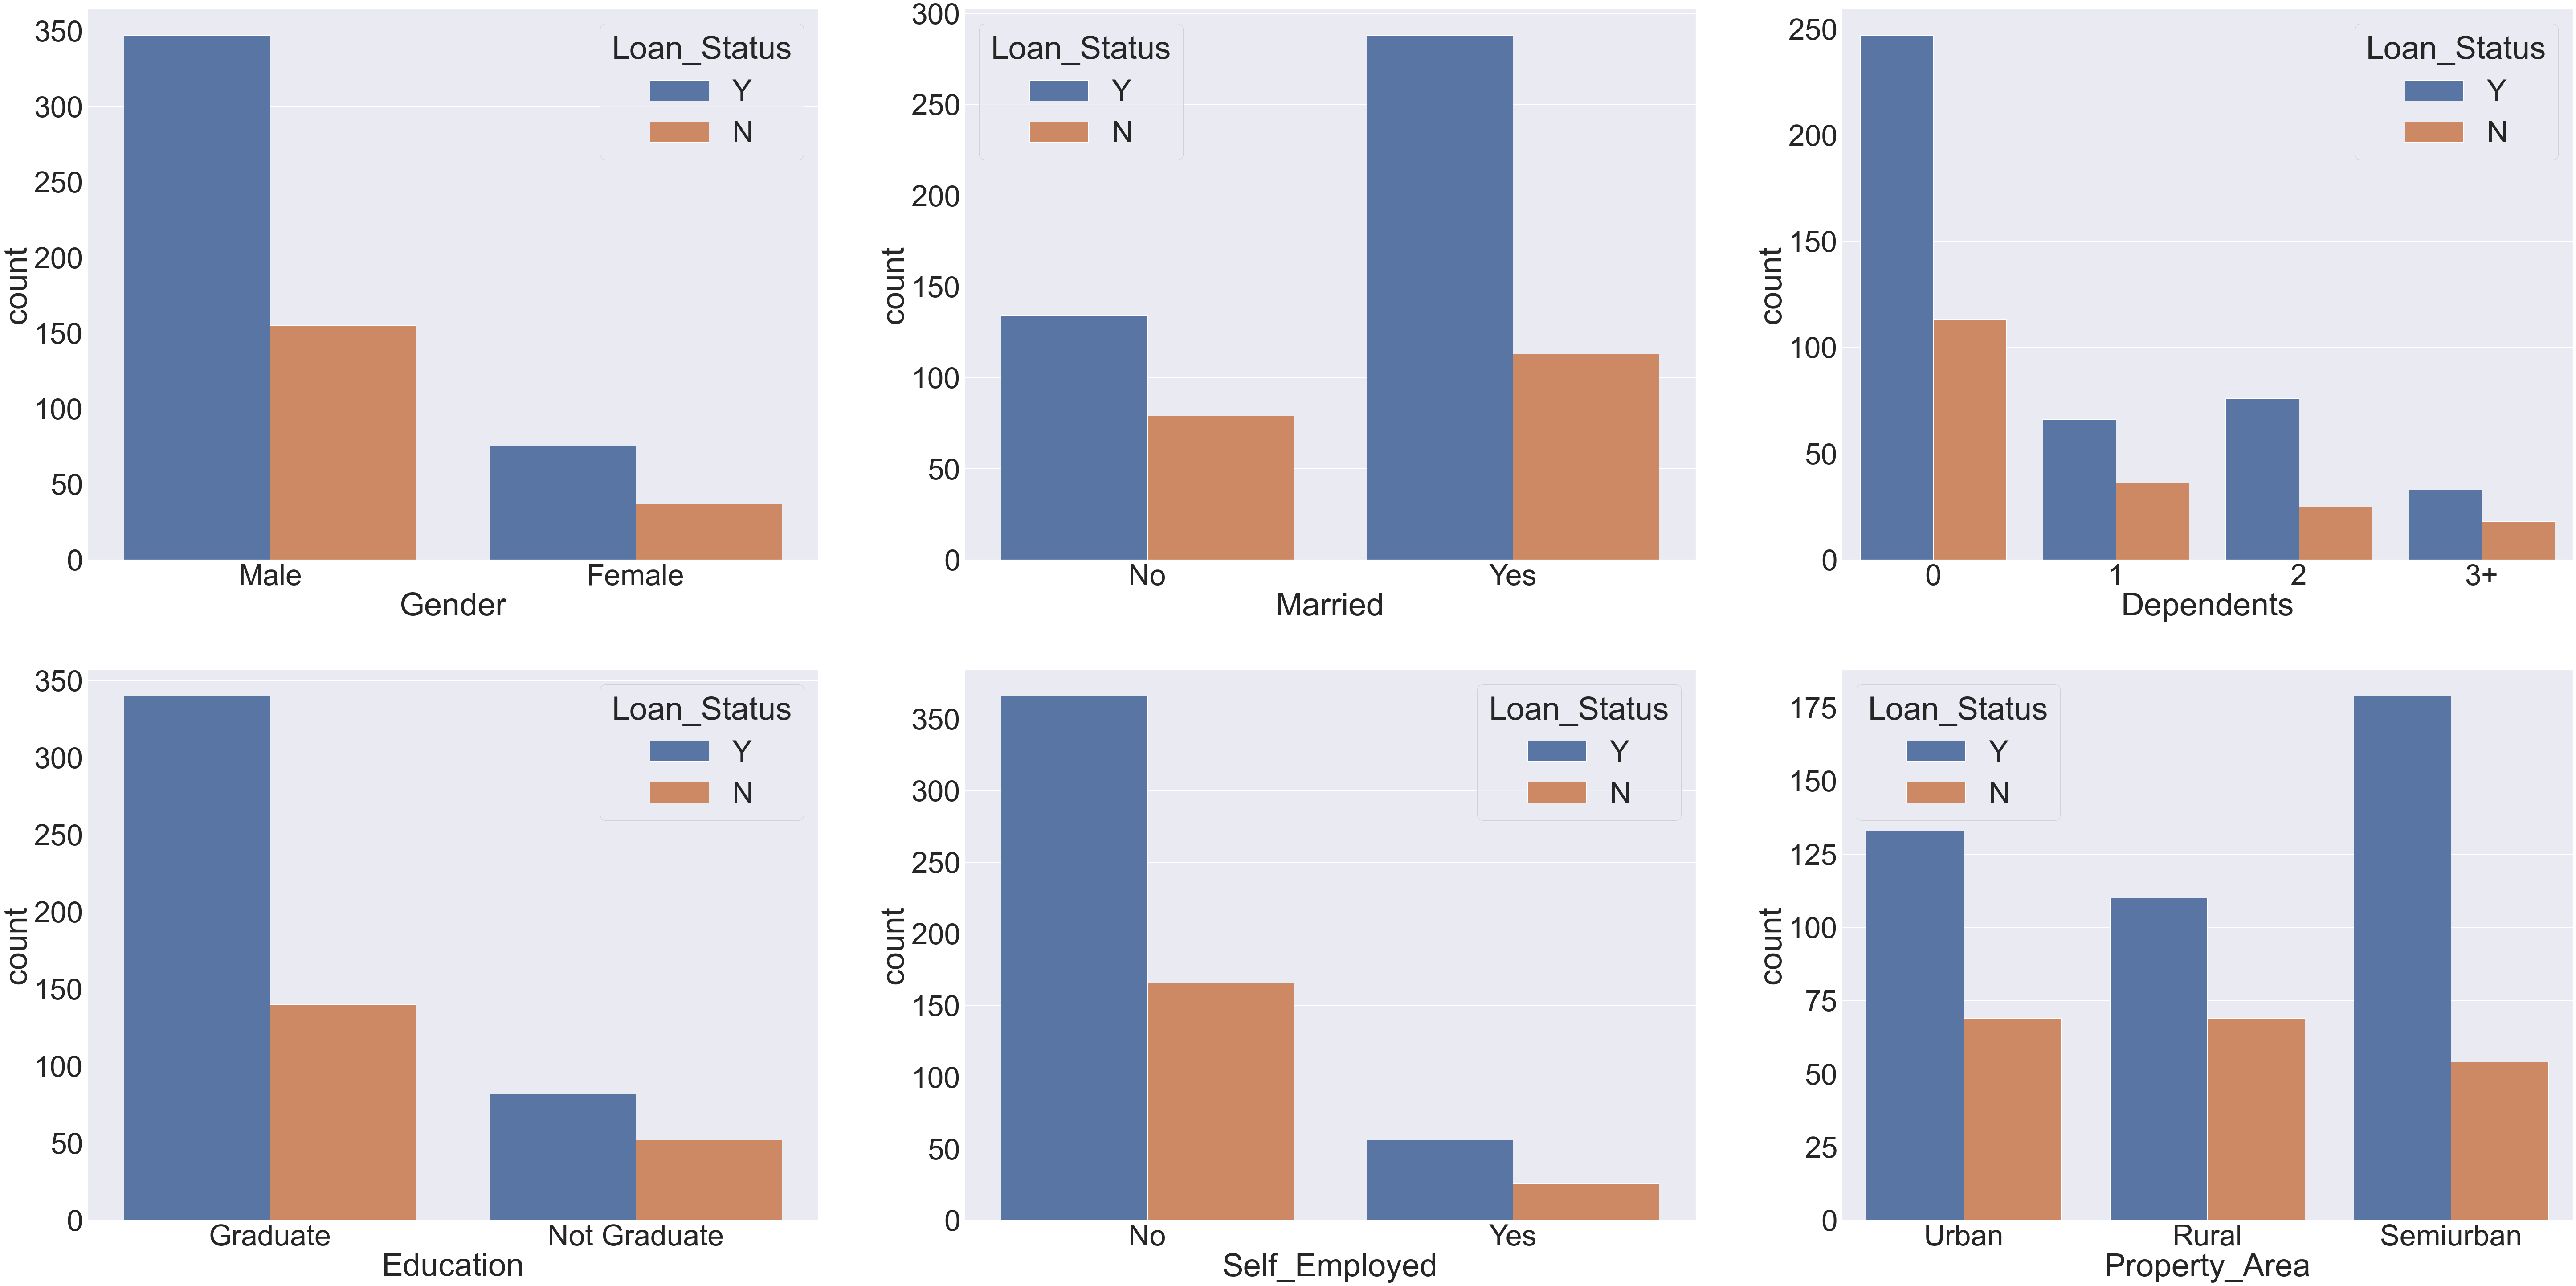

In [169]:
plt.figure(figsize=(100,50))
sns.set(font_scale =6)
num = [1, 2, 3,4,5,6]
for (n,f) in zip(num ,categ_features):
    plt.subplot(2,3,n)
    sns.countplot(data[f],hue = data['Loan_Status'],data = data)
    
    
       

### numerical features

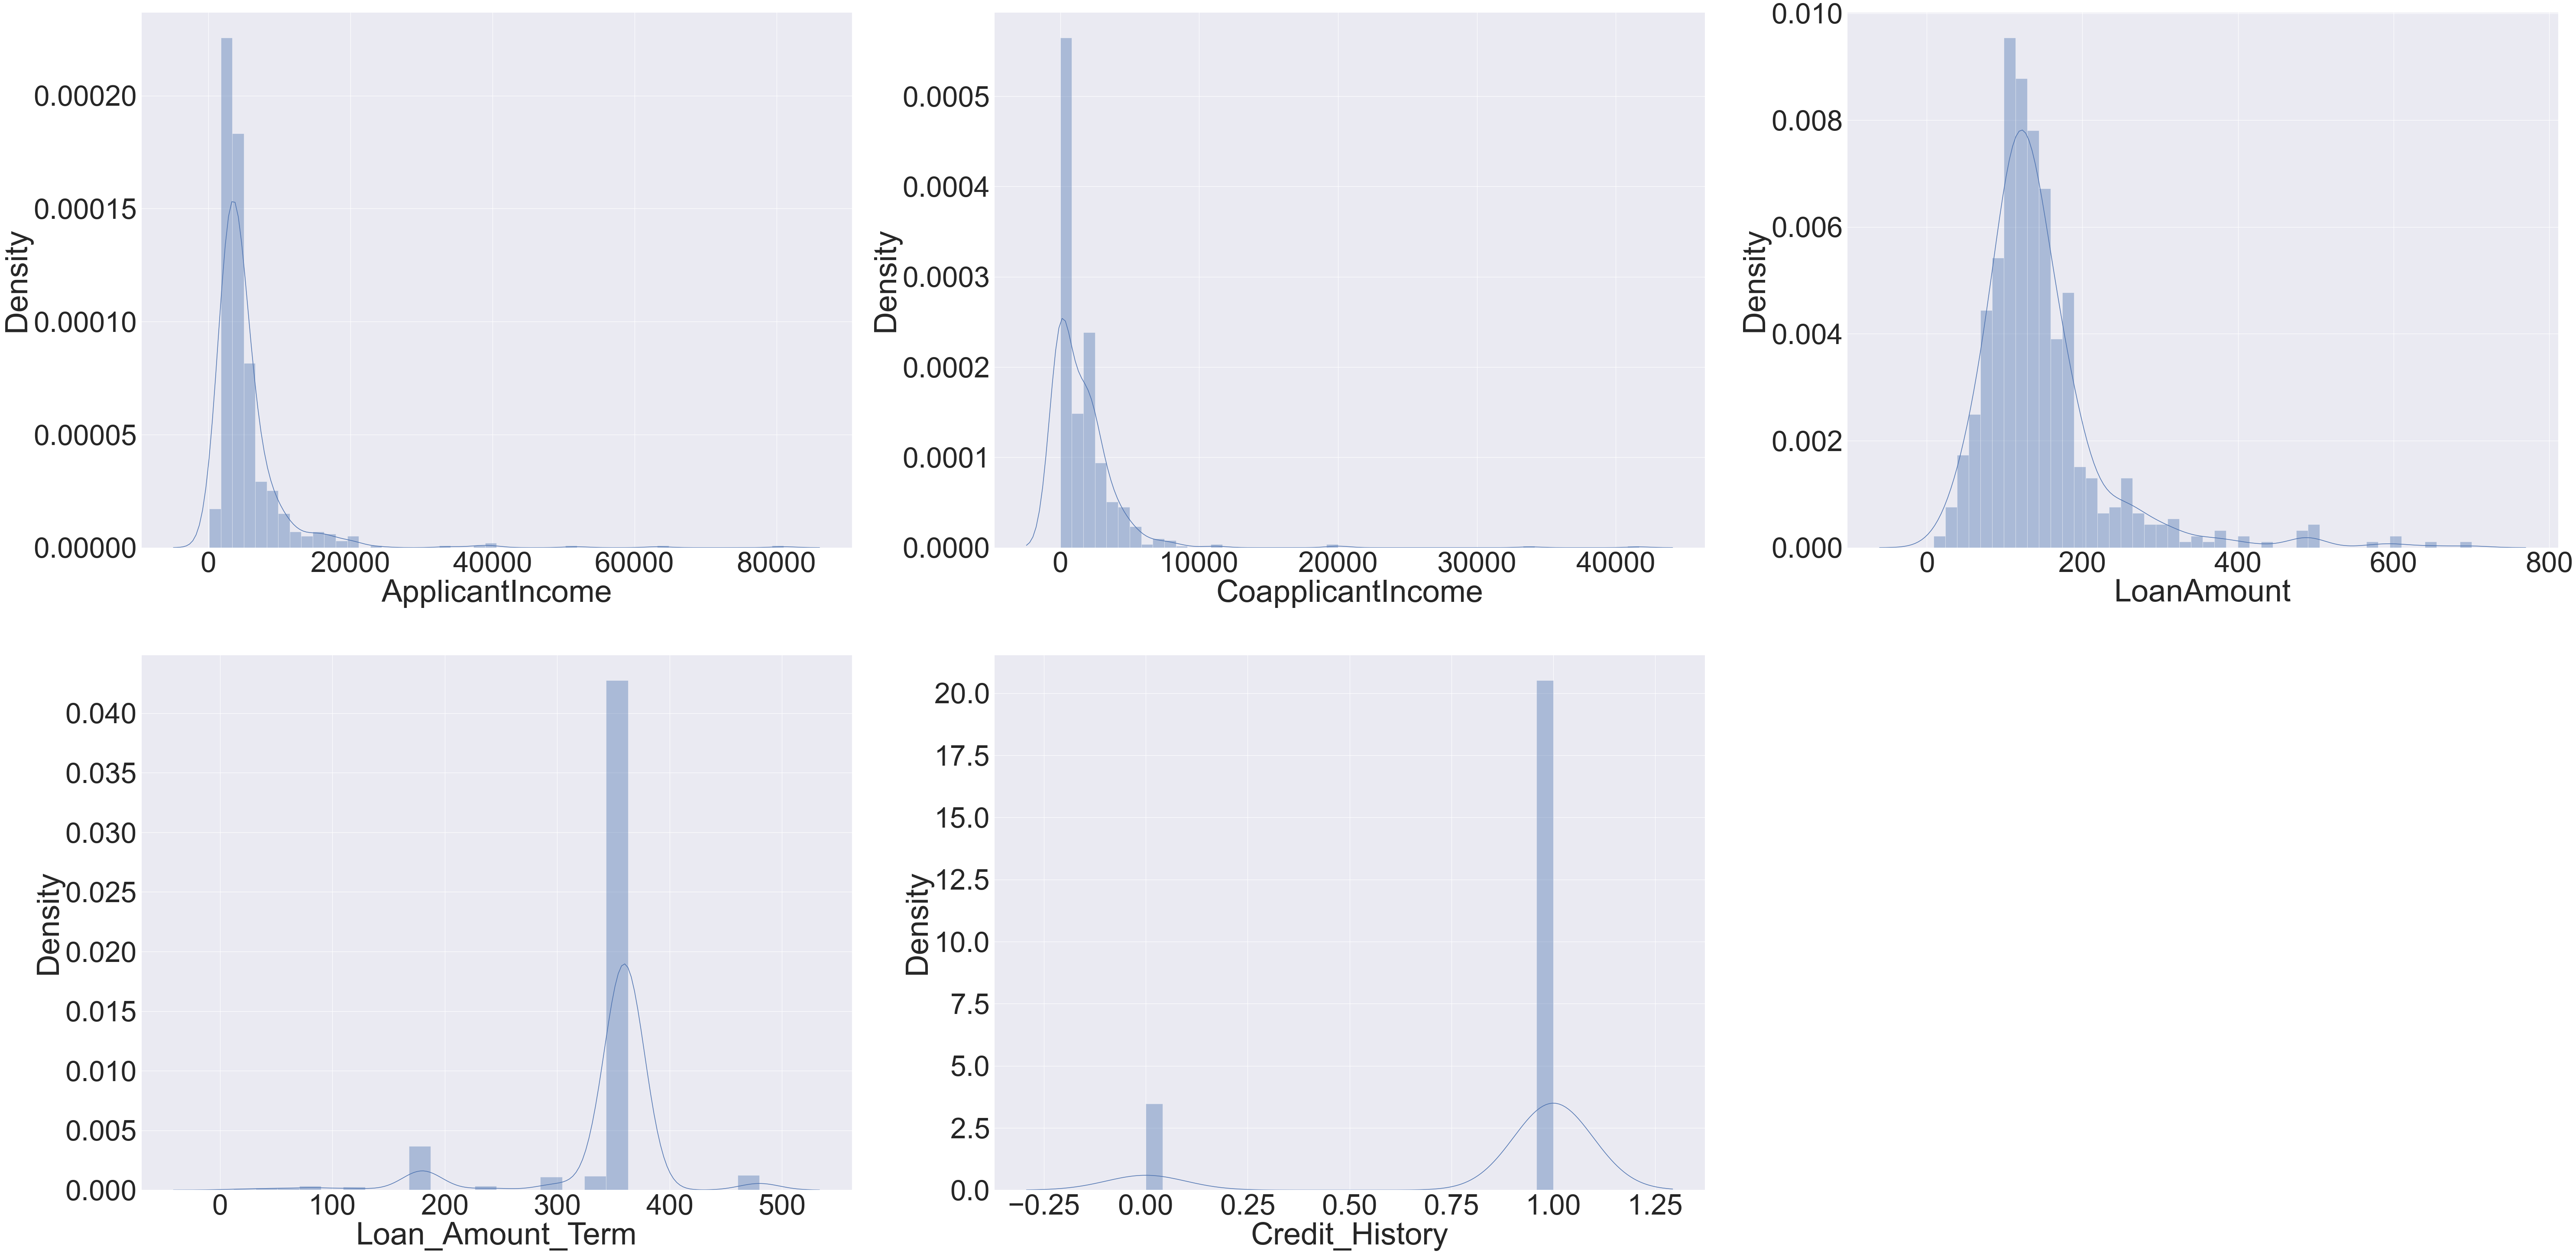

In [170]:
plt.figure(figsize=(100,50))
sns.set(font_scale =6)
num = [1, 2, 3,4,5,6]
for (n,f) in zip(num ,numer_features):
    plt.subplot(2,3,n)
    sns.distplot(data[f])

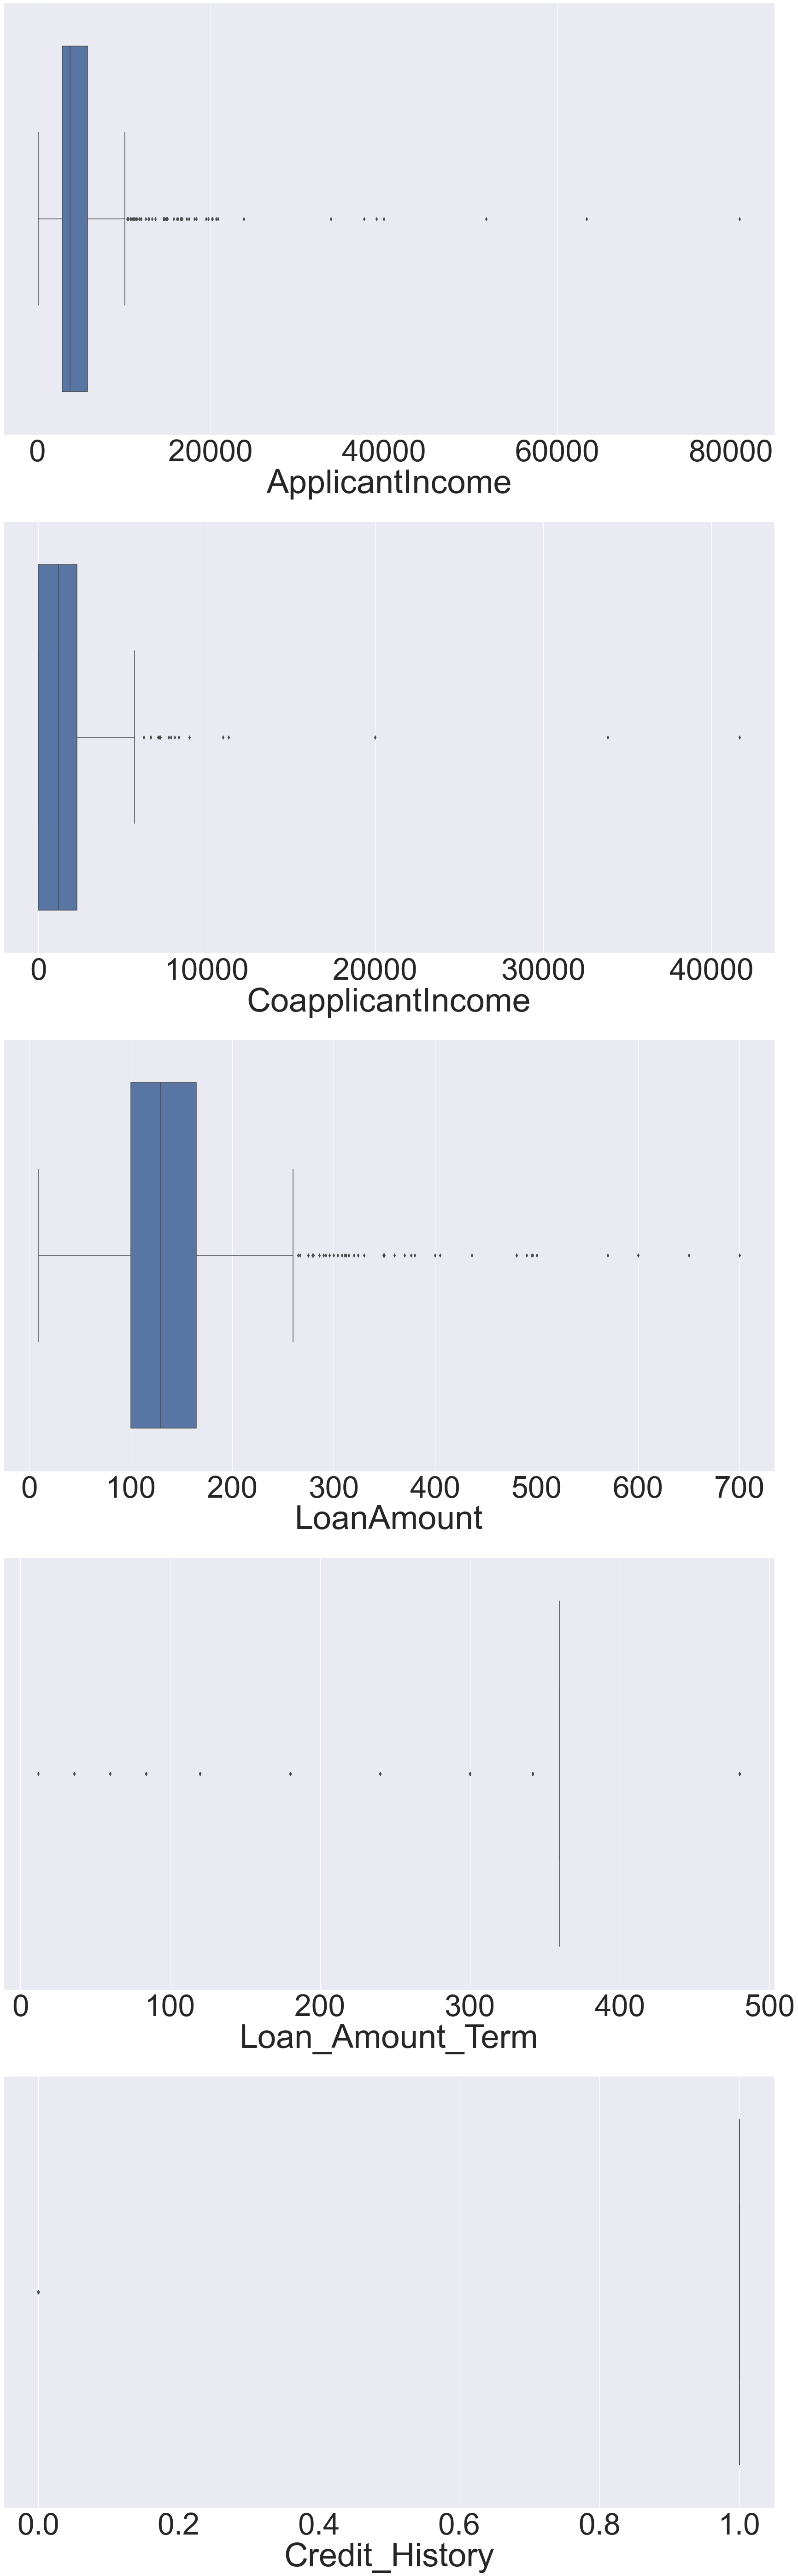

In [171]:
    
plt.figure(figsize=(30,100))

sns.set(font_scale =6)
num = [1, 2, 3,4,5,6]
for (n,f) in zip(num ,numer_features):
    plt.subplot(5,1,n)
    sns.boxplot(data[f])    

## Bivariate Plots
### Numerical & Categorical

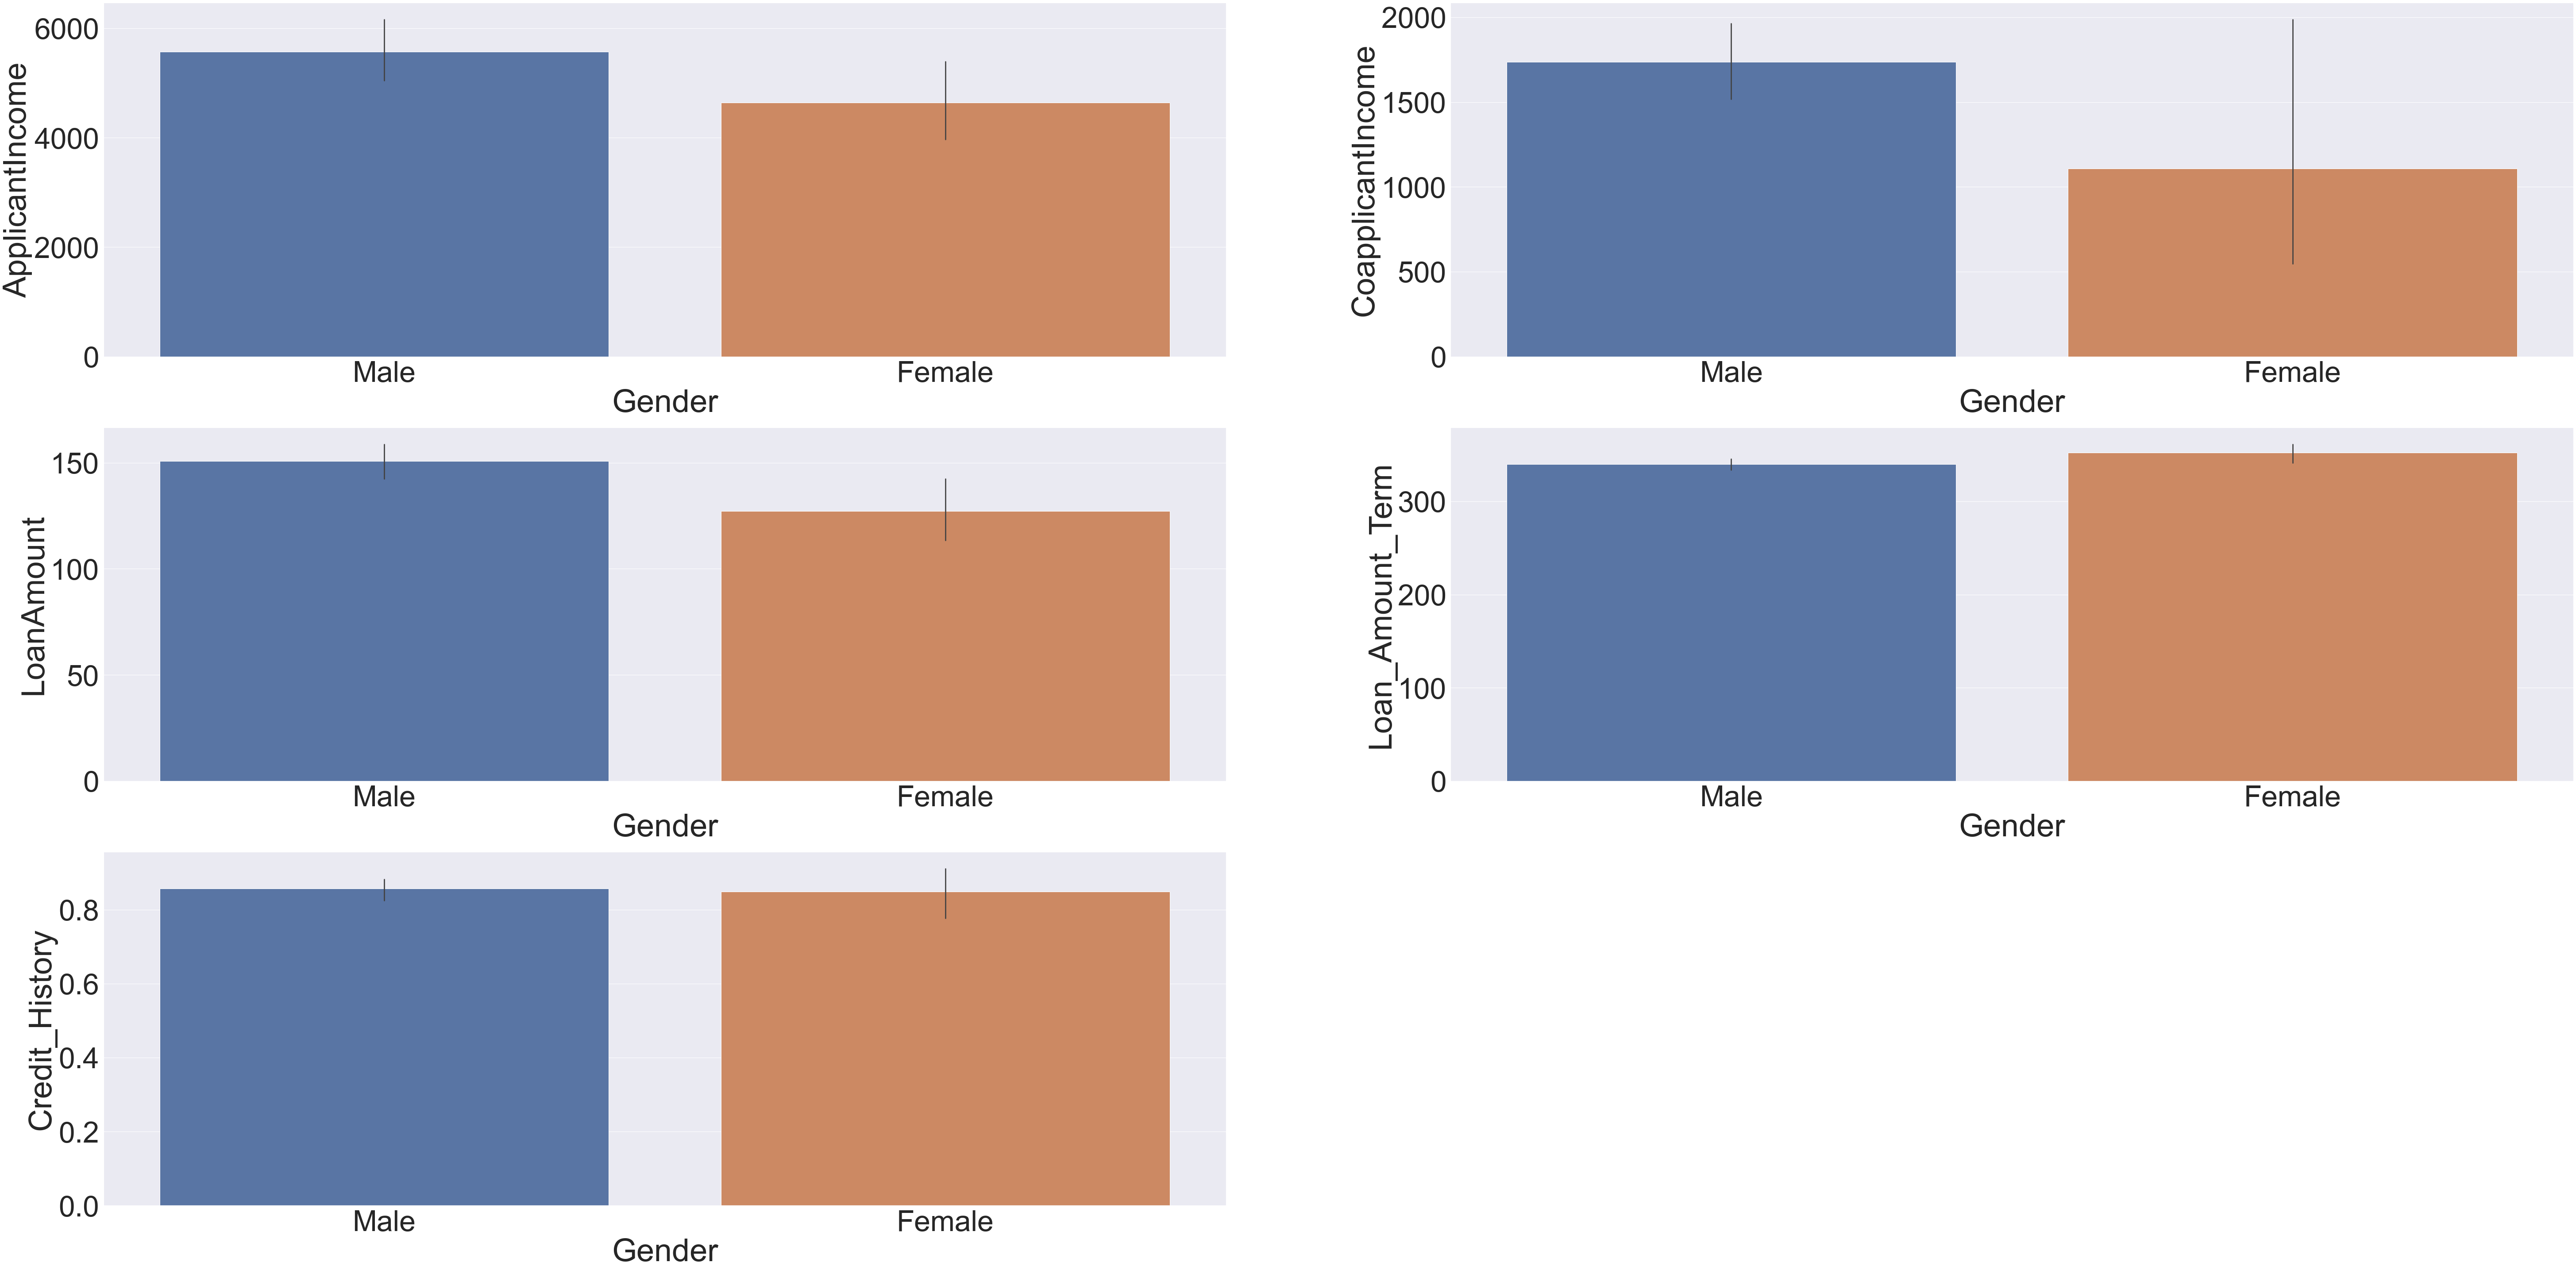

In [172]:
plt.figure(figsize=(100,50))

sns.set(font_scale =6)
num = [1, 2, 3,4,5,6]
for (n,f) in zip(num ,numer_features):
    plt.subplot(3,2,n)
    sns.barplot(x=data['Gender'],y= data[f])  
    
    
    
    

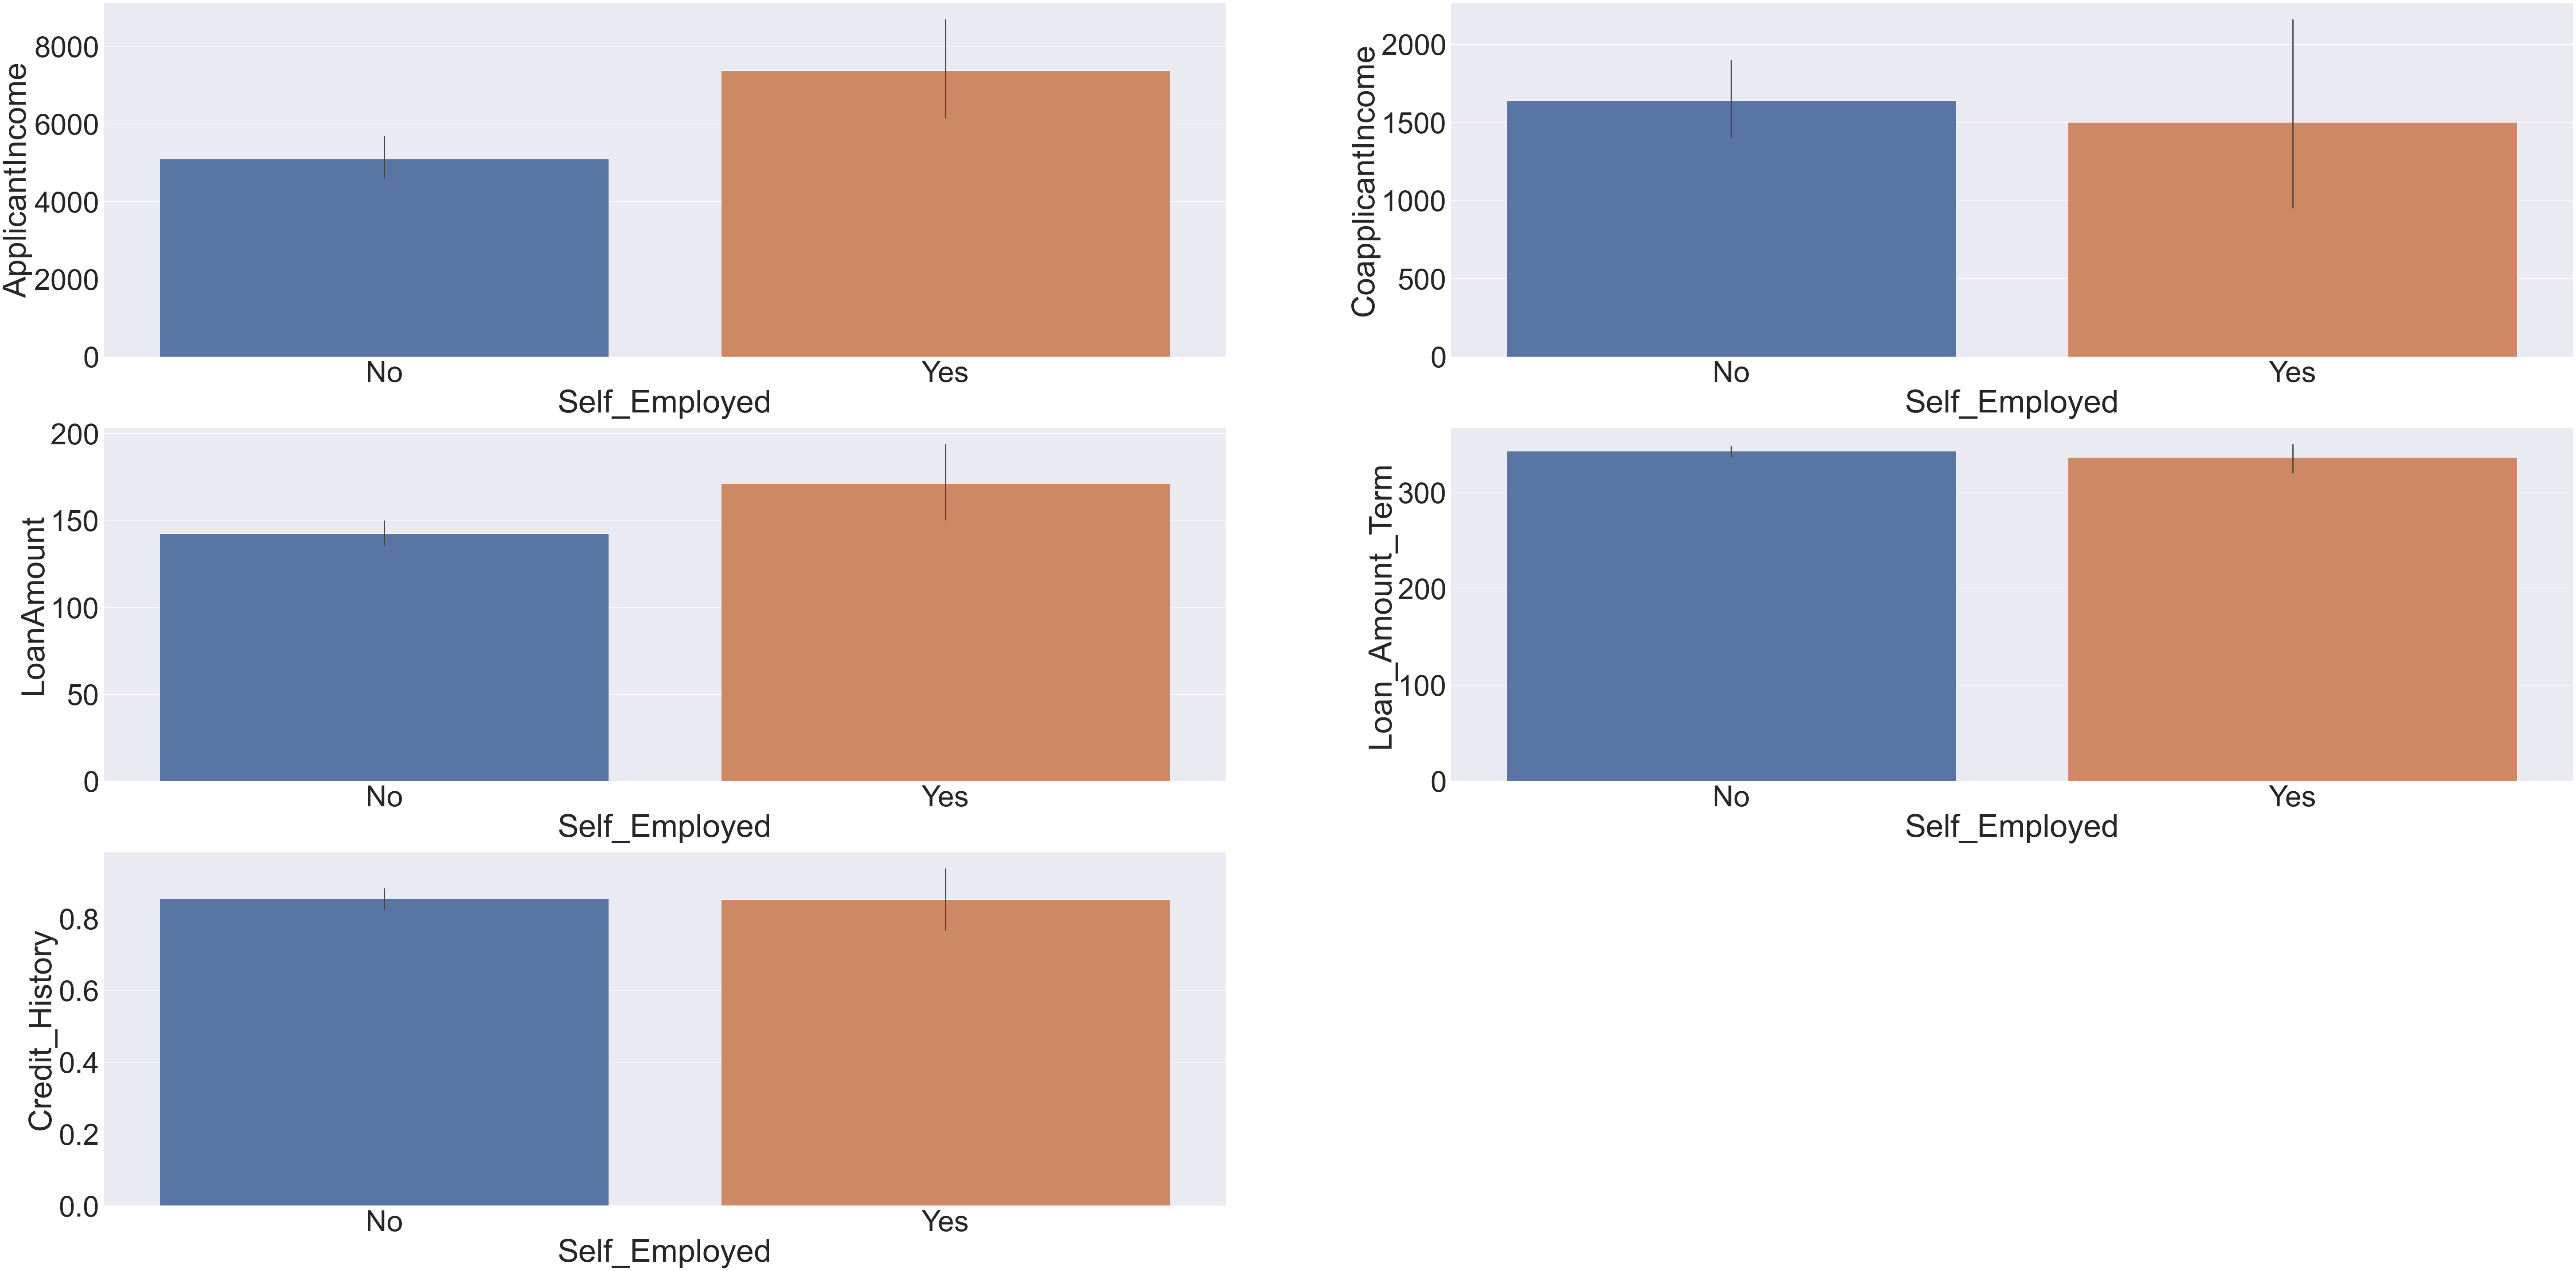

In [173]:
plt.figure(figsize=(100,50))

sns.set(font_scale =6)
num = [1, 2, 3,4,5,6]
for (n,f) in zip(num ,numer_features):
    plt.subplot(3,2,n)
    sns.barplot(x=data['Self_Employed'],y= data[f])  
    

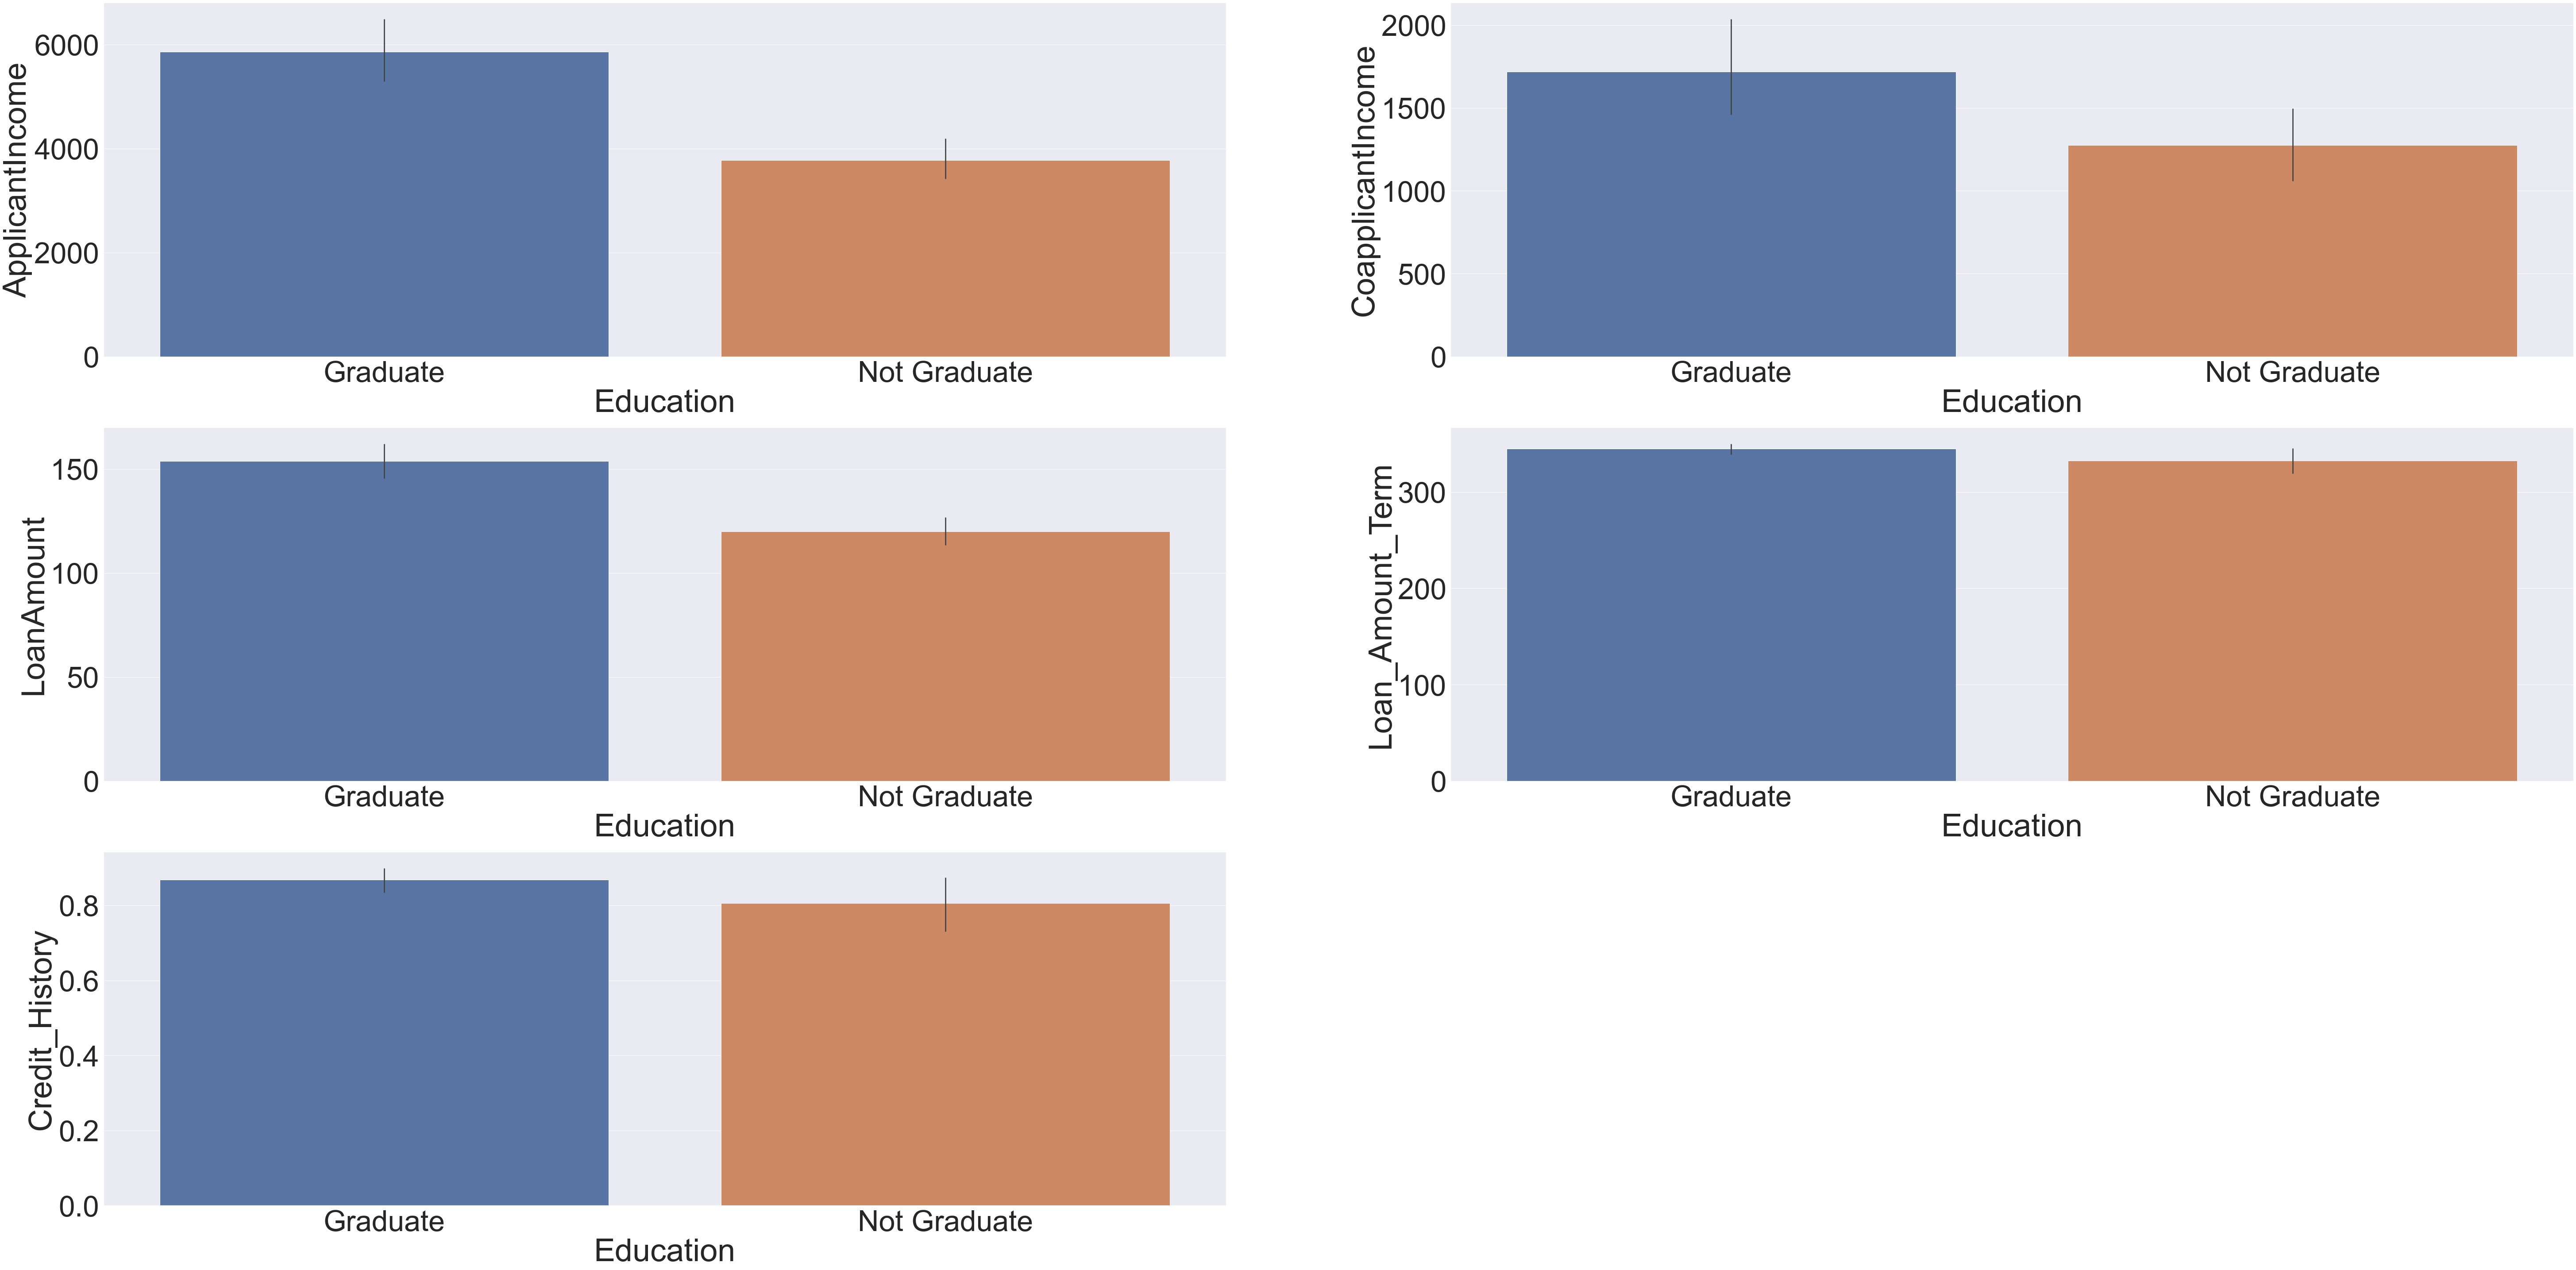

In [174]:
plt.figure(figsize=(100,50))

sns.set(font_scale =6)
num = [1, 2, 3,4,5,6]
for (n,f) in zip(num ,numer_features):
    plt.subplot(3,2,n)
    sns.barplot(x=data['Education'],y= data[f])  
    

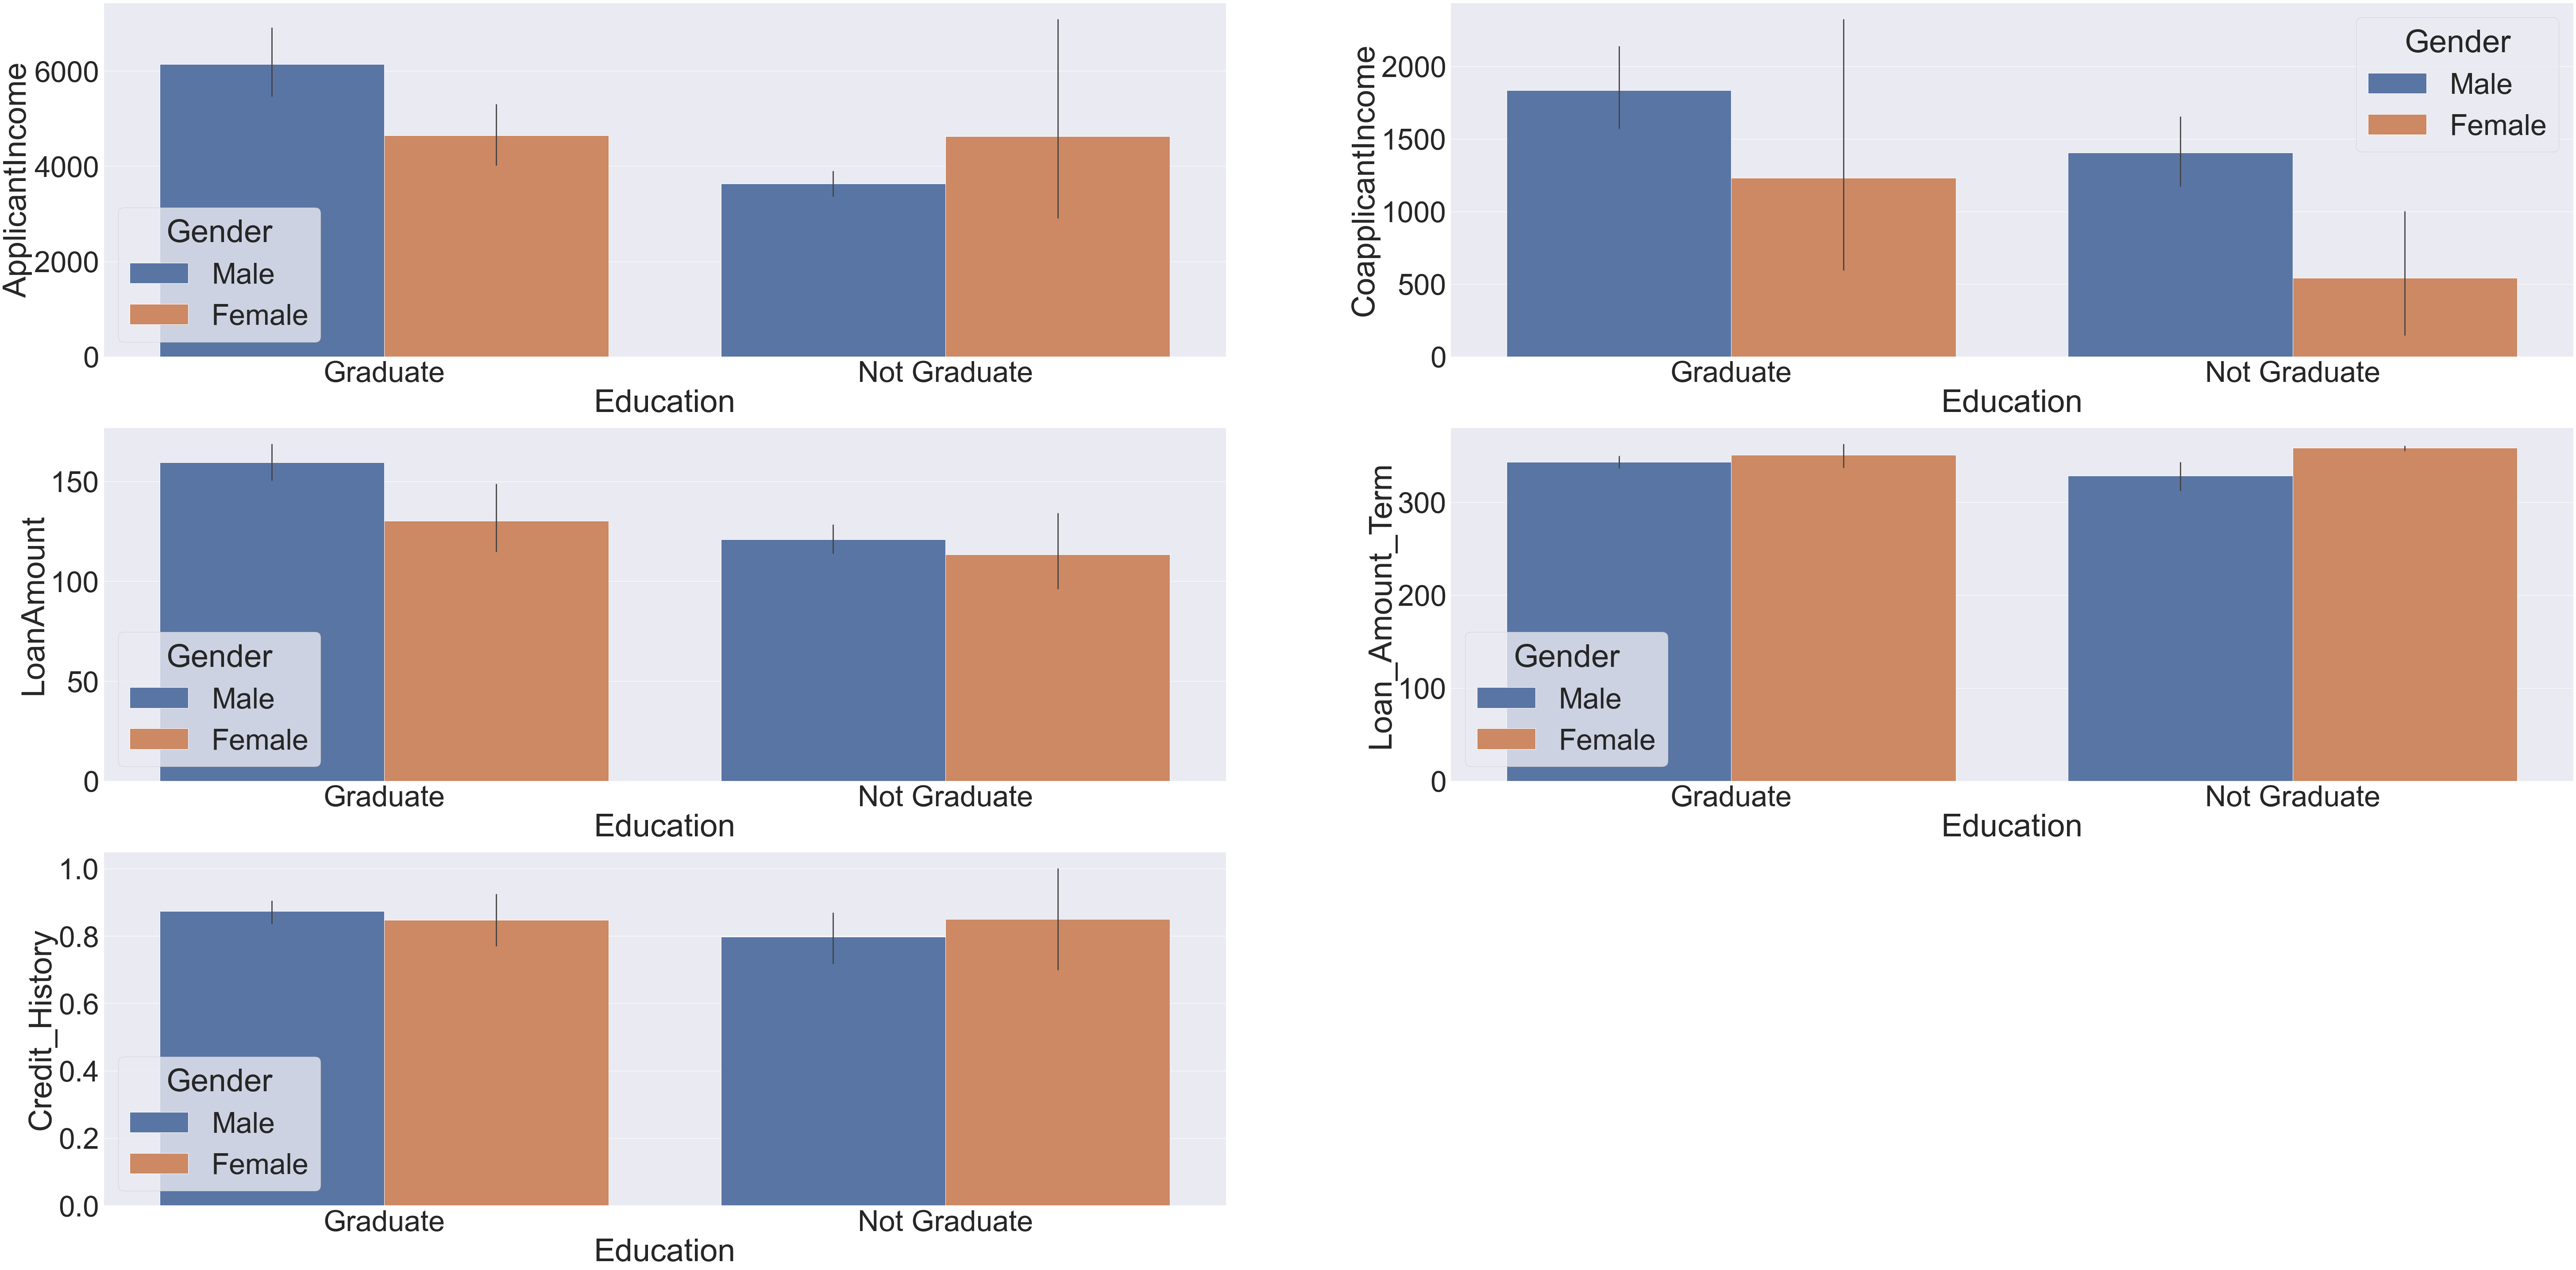

In [175]:
plt.figure(figsize=(100,50))

sns.set(font_scale =6)
num = [1, 2, 3,4,5,6]
for (n,f) in zip(num ,numer_features):
    plt.subplot(3,2,n)
    sns.barplot(x=data['Education'],y= data[f], hue = data['Gender'])  

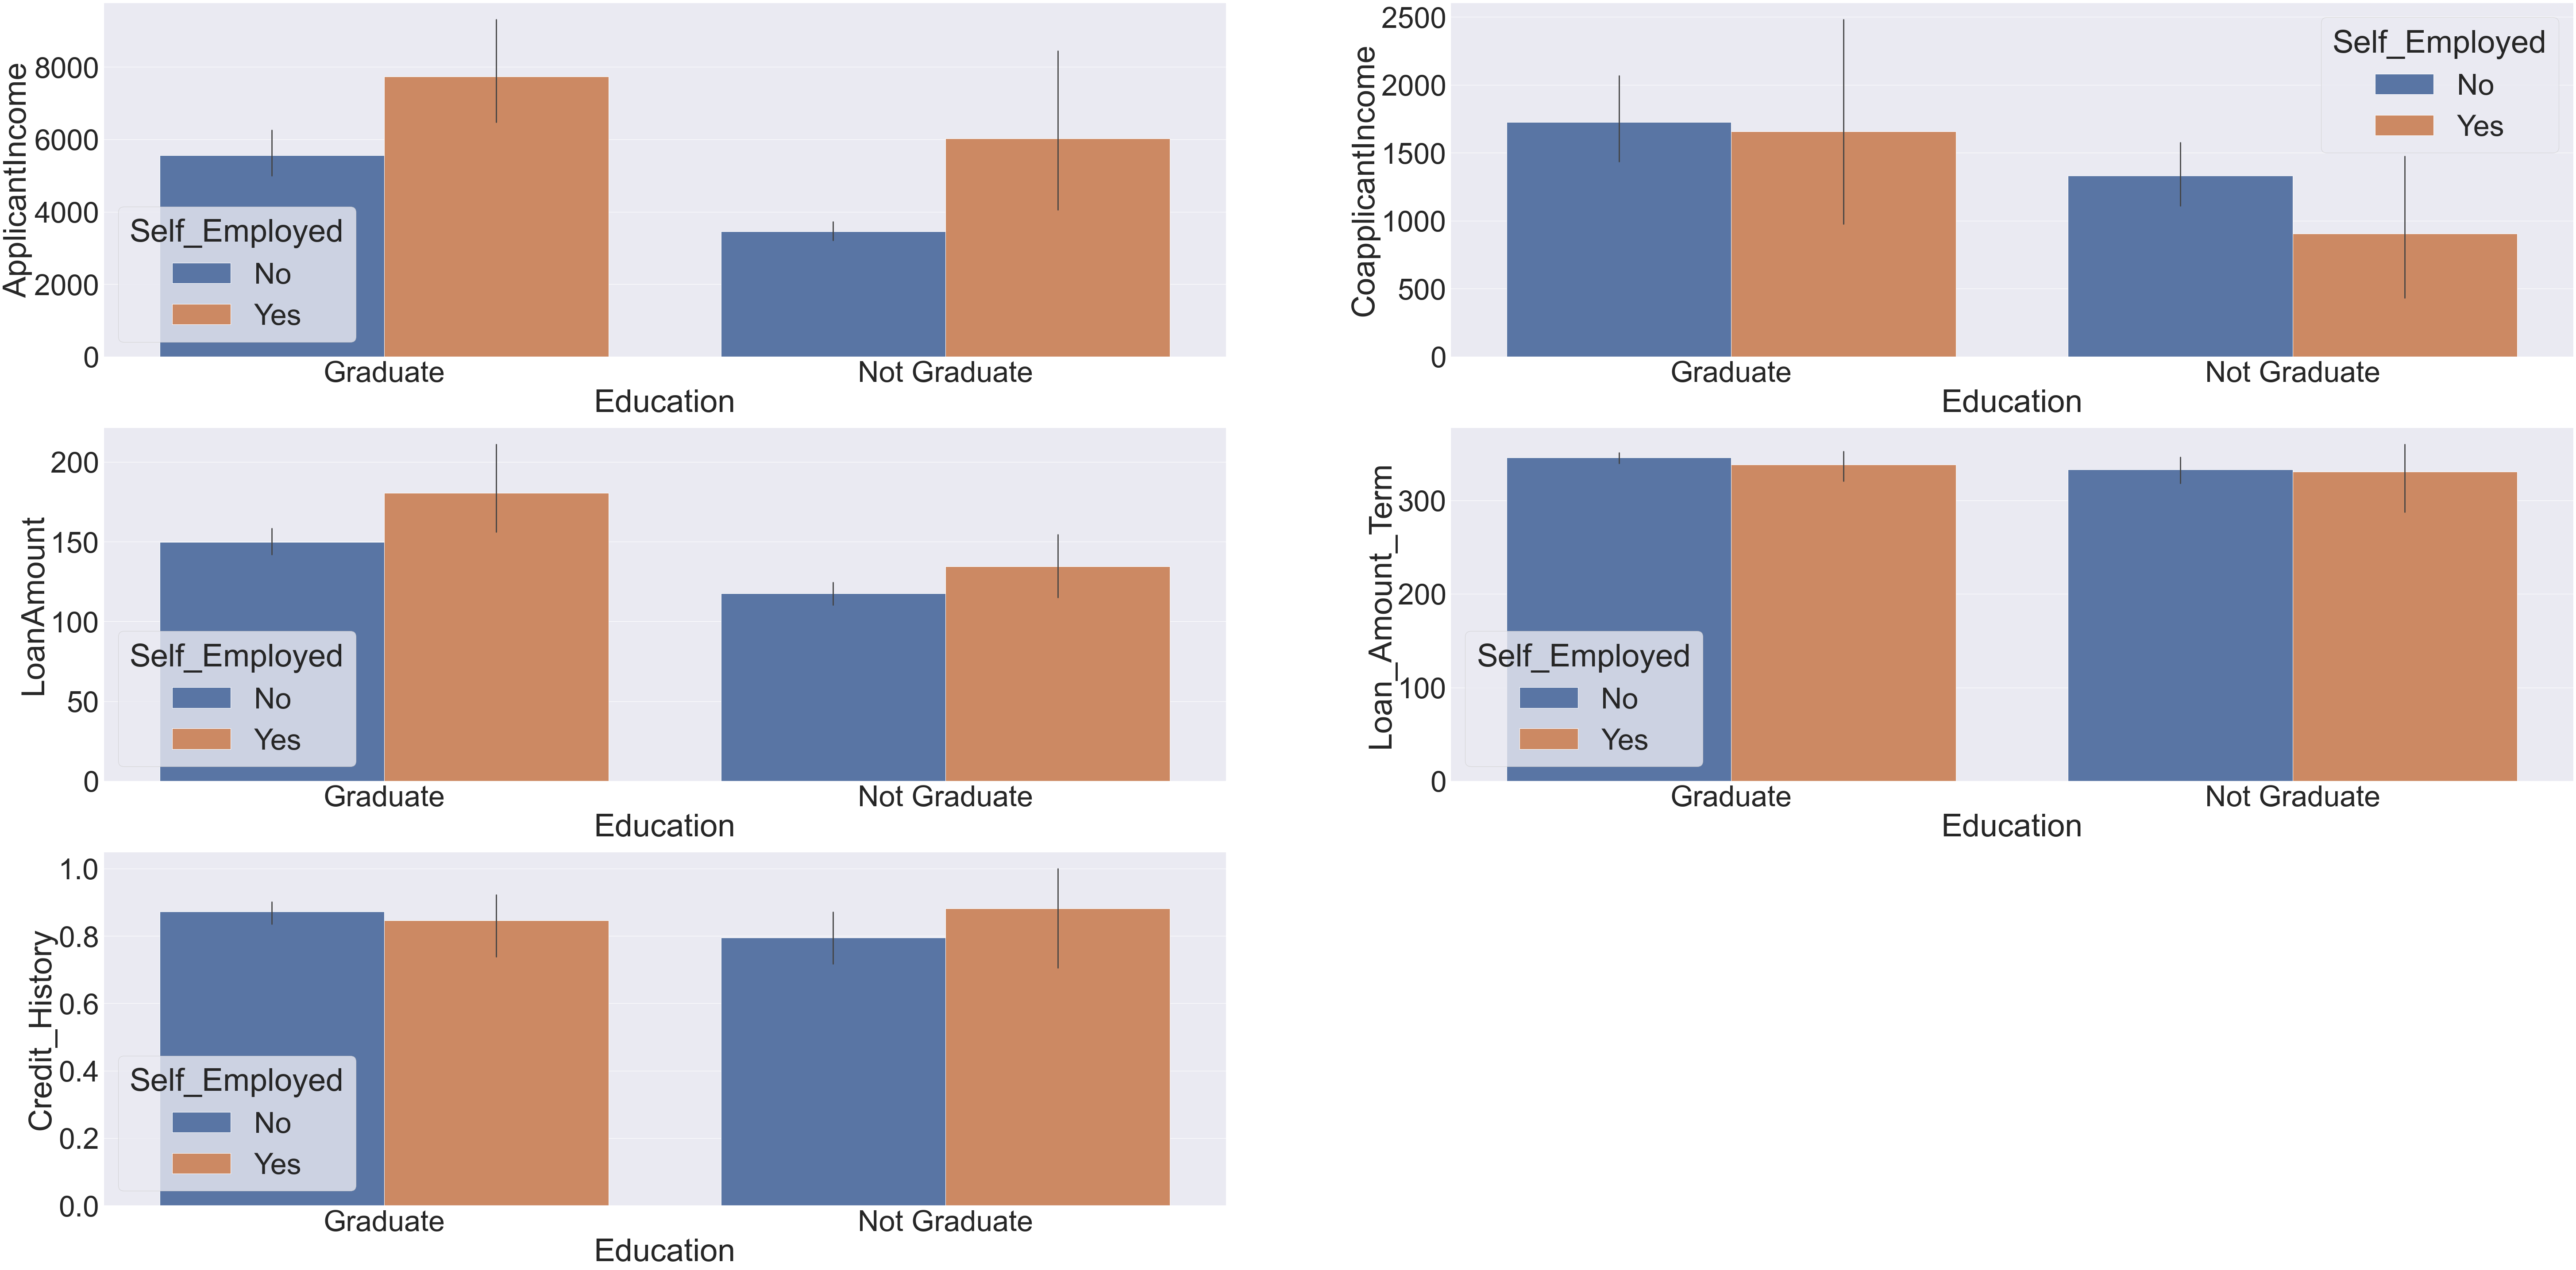

In [176]:
plt.figure(figsize=(100,50))

sns.set(font_scale =6)
num = [1, 2, 3,4,5,6]
for (n,f) in zip(num ,numer_features):
    plt.subplot(3,2,n)
    sns.barplot(x=data['Education'],y= data[f], hue = data['Self_Employed'])  

In [177]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [178]:
#############-----------------------------------------------------------------------------------------------

In [179]:
data = data.drop(columns=['Loan_ID'], axis = 1)
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### check imbalanced classes

In [180]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## save the new data after EDA

In [181]:
data.to_csv('EDA_OUT.csv', index = False, encoding='utf-8')

In [182]:
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################

In [183]:
df = pd.read_csv("EDA_OUT.csv")
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [184]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## divide the data into numerical and categorical

In [185]:
Categorical_features = df.select_dtypes(include = "object_")
Numerical_features = df.select_dtypes(include = "number")

In [186]:
Categorical_features

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [187]:
Numerical_features 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


# Pipeline

In [188]:
for feature in Categorical_features.columns:
    print("Feature {} has {} of unique values".format(feature , Categorical_features[feature].nunique()))

Feature Gender has 2 of unique values
Feature Married has 2 of unique values
Feature Dependents has 4 of unique values
Feature Education has 2 of unique values
Feature Self_Employed has 2 of unique values
Feature Property_Area has 3 of unique values
Feature Loan_Status has 2 of unique values


###  hot encoding for :
- Gender / Married / Dependents / Education / Self_Employed / Property_Area 




In [189]:
# encoding for target
df['Loan_Status'] = df['Loan_Status'].apply(lambda x : 1 if x == 'Y' else 0)

In [190]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , RobustScaler ,StandardScaler

In [191]:
Encoder = ColumnTransformer(transformers=[("OHE" , OneHotEncoder(sparse=False , drop="first") , ["Gender" , "Married" , "Dependents","Education" , "Self_Employed" , "Property_Area"]  )] ,remainder="passthrough" )

In [192]:
x = df.drop("Loan_Status" , axis = 1 )
y = df["Loan_Status"]

# Model Selection

In [193]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [194]:
models = list()
models.append(("LR" , LogisticRegression()))
models.append(("KNN" , KNeighborsClassifier()))
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(("GBC" , GradientBoostingClassifier()))

In [195]:
for model in models:
    steps = list()
    steps.append(("Encoder" , Encoder))
    steps.append(("Scaler" , RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    scores = cross_validate(pipeline , x , y , scoring="accuracy"  ,cv = 5 , return_train_score=True)
    print(model[0])
    print("Train_accuracy" , scores["train_score"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 20)
    print("\n")

LR
Train_accuracy 0.8135189508717897
----------
Test_accuracy 0.8078368652538984
--------------------


KNN
Train_accuracy 0.806593479376749
----------
Test_accuracy 0.7279888044782087
--------------------


CART
Train_accuracy 1.0
----------
Test_accuracy 0.7084632813541251
--------------------


RF
Train_accuracy 1.0
----------
Test_accuracy 0.7850459816073571
--------------------


GBC
Train_accuracy 0.8941359097908699
----------
Test_accuracy 0.7784886045581768
--------------------




## Model improvement
- choose the LogisticRegression model

In [196]:
from sklearn.model_selection import GridSearchCV

In [211]:

#grid_params = {
 # 'lr__penalty': ['l1', 'l2'],
 # 'lr__C': [1, 5, 10],
 # 'lr__max_iter': [20, 50, 100],}

#grid_vals = {'Model__penalty': ['l1','l2'], 'Model__C': [0.001,0.01,0.1,1]}



param_grid = [    
    {'Model__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'Model__C' : np.logspace(-4, 4, 20),
     'Model__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'Model__max_iter' : [100, 1000,2500, 5000]
    }
]




In [212]:
steps = list()
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , LogisticRegression()))
pipeline = Pipeline(steps = steps)

In [217]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring="accuracy"  ,cv = 5 , return_train_score=True, n_jobs=-1)

grid_search.fit(x, y)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Property_Area'])])),
                                       ('Scaler', RobustScaler()),
                                       ('Model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'Model__C': array([1.0000000...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'Model__max_iter': [100, 1000, 2500, 5000],
                          'Model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'Model__solver': ['lbfgs', 'newton-cg', 'liblinear',
                                            'sag', 'saga']}],
             return_train_score=True, scoring='accuracy')

In [218]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(grid_search.best_params_))
print("Best score is {}".format(grid_search.best_score_))

Tuned Logistic Regression Parameters: {'Model__C': 0.08858667904100823, 'Model__max_iter': 100, 'Model__penalty': 'l1', 'Model__solver': 'liblinear'}
Best score is 0.809462881514061


In [219]:
grid_search.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('Scaler', RobustScaler()),
                ('Model',
                 LogisticRegression(C=0.08858667904100823, penalty='l1',
                                    solver='liblinear'))])

In [220]:
final_model = grid_search.best_estimator_

In [221]:
inputs = x.columns

In [222]:
import joblib

In [223]:
joblib.dump(final_model , "Model.pkl")
joblib.dump( inputs , "Inputs.pkl" )

['Inputs.pkl']

In [224]:
final_model.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [225]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [257]:
%%writefile app.py
import streamlit as st
import joblib 
import pandas as pd
import base64

Inputs = joblib.load("Inputs.pkl")
Model = joblib.load("Model.pkl")
df = pd.read_csv("EDA_OUT.csv")

def predict(Gender, Married, Dependents, Education, Self_Employed,ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term, Credit_History, Property_Area):
    
    test_df = pd.DataFrame(columns = Inputs)
    test_df.at[0,"Gender"] = Gender
    test_df.at[0,"Married"] = Married
    test_df.at[0,"Dependents"] = Dependents
    test_df.at[0,"Education"] = Education
    test_df.at[0,"Self_Employed"] = Self_Employed
    test_df.at[0,"ApplicantIncome"] = ApplicantIncome
    test_df.at[0,"CoapplicantIncome"] = CoapplicantIncome
    test_df.at[0,"LoanAmount"] = LoanAmount
    test_df.at[0,"Loan_Amount_Term"] = Loan_Amount_Term
    test_df.at[0,"Credit_History"] = Credit_History
    test_df.at[0,"Property_Area"] = Property_Area
    
    result = Model.predict(test_df)[0]
    
    return result
    
    
def main():
    
    def add_bg_from_local(image_file):
        with open(image_file, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read())
            st.markdown(
           f"""
           <style>
           .stApp {{
               background-image: url(data:image/{"ipg"};base64,{encoded_string.decode()});
               background-size: cover
           }}
           </style>
           """,
           unsafe_allow_html=True
           )
    add_bg_from_local('back9.jpg')

    st.markdown("## Predict If Loan Will Be Approved Or Not  ")
    st.markdown('______________________________________')
    col1, col2 = st.columns(2)
    
    with col1:
        
        Gender = st.selectbox('Select the applicant gender ',df['Gender'].unique())
        Married = st.selectbox('Select if the applicant is married or not',df['Married'].unique())
        Dependents = st.selectbox('Select number of Dependents for this Applicant ', df['Dependents'].unique())
        Education = st.selectbox("Select if the applicant is educated or not ",df['Education'].unique())
        Self_Employed = st.selectbox('Select if the applicant is Self_Employed or not', df['Self_Employed'].unique())
        Credit_History = st.selectbox('Select 1 if applicant Credit_History is good', df['Credit_History'].unique())
        
        
    with col2:
        ApplicantIncome = st.slider("Applicant Income" , min_value=0, max_value=81000, value=0, step=1)
        CoapplicantIncome = st.slider("Coapplicant Income" , min_value=0, max_value=41667, value=0, step=1)
        LoanAmount = st.slider("LoanAmount in thousands" , min_value=0, max_value=1000, value=0, step=1)
        Loan_Amount_Term =st.slider("Loan Amount Term in months" , min_value=12, max_value=480, value=12, step=12)
        Property_Area = st.selectbox('Select the Property Area',df['Property_Area'].unique())

    with col1:
        if st.button(' Predict '):
            
            result = predict(Gender, Married, Dependents, Education, Self_Employed,ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term, Credit_History, Property_Area)
            #label = ["Loan cannot be approved ","Loan will be approved "]
            #st.text("The Prediction is {}".format(label[result]))
            if result == 1:
                res = '<p style="font-family:Verdana;color:#4BFF58; font-size: 20px;">Loan will be approved😊</p>'
                st.markdown(res,unsafe_allow_html=True)
            elif result == 0:
                res = '<p style="font-family:Verdana; color:#FF4B4B; font-size: 20px;">Loan cannot be approved 🥺</p>'
                st.markdown(res,unsafe_allow_html=True)    
            
            
if __name__ == '__main__':
    main()    
    

Overwriting app.py
